### Librerias Necesarias

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

## EXPLORANDO EL NEGOCIO

### Tabla clientes

● account -> Numero de cuenta del usuario

● sex -> Sexo

● civil_status -> Estado civil usuario

● education_level -> Nivel educativo usuario

● flag_use -> Marcación binaria, 1 si el usuario ha realizado una transferencia o compra como cuenta src, 0 si no.

● last_date_tx -> Fecha de la ultima transacción generada por el usuario como cuenta src.

● generation -> Categoría de edad del usuario.

● flag_referred -> Marcación binaria, 1 si el usuario fue referido por otro usuario al ingresar a la billetera, 0 si no.

In [2]:
### Base de datos de clientes
clients = pd.read_excel(r'clients.xlsx')
print('Shape Tabla Clientes', clients.shape)
clients.head(5)

Shape Tabla Clientes (90808, 8)


,account,sex,civil_status,education_level,flag_use,last_date_tx,generation,flag_referred
0,73656722,Hombre,Casado,Bachillerato,1,2022-09-11,Millennials,1
1,73533953,Hombre,Soltero,Bachillerato,1,2022-08-30,Millennials,0
2,73081212,Mujer,Soltero,Bachillerato,1,2022-08-28,Millennials,0
3,74128769,Hombre,Casado,Bachillerato,1,2023-02-04,Millennials,0
4,73732039,Hombre,Soltero,Basica,1,2022-09-13,Centennials,1


### Analisis Descriptivo
Se tienen en la data 90808 cuentas de usuario, se identifica que la variable fecha de la ultima transaccion (las_date_tx) es la única que presenta datos faltantes (5336).


**Análisis univariado**

La proporción de hombres y mujeres está equilibrada con un 50.5% de mujeres y 49.4% de hombres.

El 81.2% de los usuarios son solteros, seguido del 14.8% casados, 2.7% divorsiados y el 1% restante son viudos o en union de hecho.

El 64.4% de los usuarios tienen un nivel educativo de bachillerato, seguido de 18% básica y 16% superior.

La generacion de los usuarios con mayor participación son los millenials con un 64.4%, seguido de centenialls con un 21.4%, además de la generación X con el 11.1% y el resto son baby boomers o silent generation.

El 94% de los usuarios ha realizado una transferencia o compra.

El 78.5% son usuarios referidos por otro usuario al ingresar a la billetera.

Por ultimo, se idenfica que la fecha mas antigua de transaccion de los usuarios fue el 12/01/2022 y la mas reciente 06/02/2023.

In [20]:
#conteo de datos faltantes
clients.isna().sum()

account               0
sex                   0
civil_status          0
education_level       0
flag_use              0
last_date_tx       5336
generation            0
flag_referred         0
dtype: int64

In [36]:
##validacion de duplicados por cuenta
clients[clients.duplicated(subset=['account'])]

,account,sex,civil_status,education_level,flag_use,last_date_tx,generation,flag_referred


In [41]:
clients.dtypes

account                     int64
sex                        object
civil_status               object
education_level            object
flag_use                    int64
last_date_tx       datetime64[ns]
generation                 object
flag_referred               int64
dtype: object

In [3]:
## Se convierte la variable account en texto
clients['account']=clients['account'].astype(int).astype(str)
clients.dtypes

account                    object
sex                        object
civil_status               object
education_level            object
flag_use                    int64
last_date_tx       datetime64[ns]
generation                 object
flag_referred               int64
dtype: object

In [4]:
clients['flag_use']=clients['flag_use'].astype(int)
clients['flag_referred']=clients['flag_referred'].astype(int)
clients.dtypes

account                    object
sex                        object
civil_status               object
education_level            object
flag_use                    int32
last_date_tx       datetime64[ns]
generation                 object
flag_referred               int32
dtype: object

Mujer     45897
Hombre    44911
Name: sex, dtype: int64
Mujer     0.505429
Hombre    0.494571
Name: sex, dtype: float64


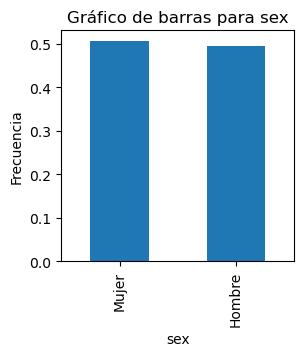

Soltero              73796
Casado               13506
Divorciado            2537
Viudo                  549
En Union De Hecho      420
Name: civil_status, dtype: int64
Soltero              0.812660
Casado               0.148731
Divorciado           0.027938
Viudo                0.006046
En Union De Hecho    0.004625
Name: civil_status, dtype: float64


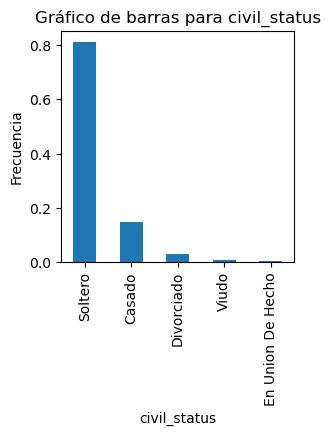

Bachillerato    58533
Basica          16886
Superior        15224
Ninguna           165
Name: education_level, dtype: int64
Bachillerato    0.644580
Basica          0.185953
Superior        0.167650
Ninguna         0.001817
Name: education_level, dtype: float64


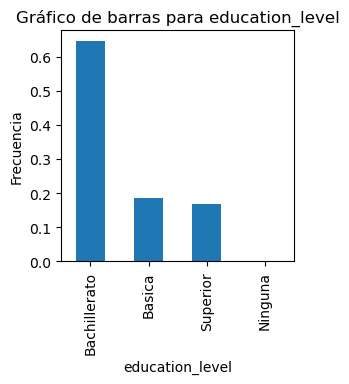

1    85472
0     5336
Name: flag_use, dtype: int64
1    0.941239
0    0.058761
Name: flag_use, dtype: float64


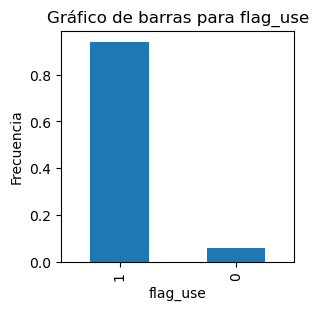

Millennials          58523
Centennials          19442
X Generation         10141
Baby Boomers          2648
Silent Generation       54
Name: generation, dtype: int64
Millennials          0.644470
Centennials          0.214100
X Generation         0.111675
Baby Boomers         0.029160
Silent Generation    0.000595
Name: generation, dtype: float64


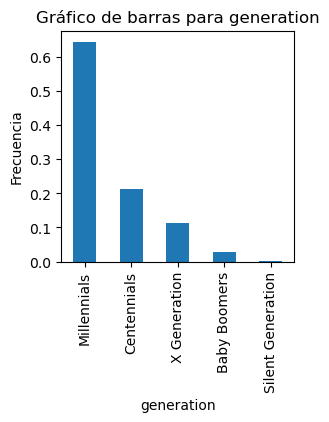

1    71306
0    19502
Name: flag_referred, dtype: int64
1    0.785239
0    0.214761
Name: flag_referred, dtype: float64


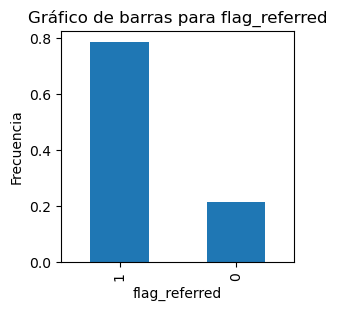

In [68]:
# Configurar las columnas de datos
columnas_valores = [col for col in clients.columns if 'account' not in col and 'last_date_tx' not in col]
#columnas_valores

for col in columnas_valores:
    frecuencia = clients[col].value_counts(normalize=True)
    print(clients[col].value_counts())
    print(clients[col].value_counts(normalize=True))
    plt.figure(figsize=(3, 3))
    frecuencia.plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Gráfico de barras para {col}')
    plt.show()


In [69]:
clients['last_date_tx'].nunique()

334

In [71]:
print(clients['last_date_tx'].min())
print(clients['last_date_tx'].max())

2022-01-12 00:00:00
2023-02-06 00:00:00


In [ ]:
clients['last_date_tx'].min()

### Tabla transaccional

● src -> Cuenta que origina la transacción.

● dst -> Cuenta destino de la transacción /comercio.

● total -> Monto de la transacción.

● trx_type -> Tipo de transacción, toma valores "Compra" si fue una compra realizada con tarjeta, o "Transferencia" si se envía dinero de una cuenta a otra.

● trx_date -> Fecha en la que se realizó la transacción.

In [5]:
## Base de datos de transacciones
txs = pd.read_excel('txs.xlsx',sheet_name="grp_trnx")
print('Shape Tabla Clientes', txs.shape)
txs.head(5)

Shape Tabla Clientes (326607, 5)


,src,dst,total,trx_type,trx_date
0,72856503.0,523781.0,2.42,Compras,2022-08-07
1,72412283.0,523779.0,0.31,Compras,2022-08-07
2,72856503.0,523780.0,0.49,Compras,2022-08-07
3,72856503.0,523782.0,0.59,Compras,2022-08-07
4,72412288.0,LATINOMEDICAL KS,5.15,Compras,2022-11-07


### Revisión calidad de datos
Se tienen en la data 326607 transacciones, de las cuales se tiene 174 numeros de cuenta que origina la transaccion faltantes (0.05%).

Se identifican 26263 transacciones duplicadas en la base de datos (8%).

**Procedimiento:**

Se procede a eliminar datos faltantes de los numeros de cuenta que originan la transaccion.
Se procede a eliminar datos duplicados


In [38]:
#conteo de datos faltantes
txs.isna().sum()

src         174
dst           0
total         0
trx_type      0
trx_date      0
dtype: int64

In [39]:
txs[txs.duplicated()]

,src,dst,total,trx_type,trx_date
40,73371949.0,PedidosYa Supermerca,4.32,Compras,2022-11-07
88,73188568.0,PedidosYa Restaurant,0.79,Compras,2022-11-07
116,74021747.0,PAYPAL *STARPLUS,0.31,Compras,2022-11-07
117,74021747.0,PAYPAL *STARPLUS,0.31,Compras,2022-11-07
118,74021747.0,PAYPAL *STARPLUS,0.31,Compras,2022-11-07
...,...,...,...,...,...
326552,73589423.0,73418495,6.14,Transferencia,2022-09-10
326564,73383166.0,73395596,0.92,Transferencia,2022-08-27
326578,73395871.0,73768949,0.00,Transferencia,2022-09-01
326588,73479208.0,73644610,0.31,Transferencia,2022-08-31


In [42]:
txs.dtypes

src                float64
dst                 object
total              float64
trx_type            object
trx_date    datetime64[ns]
dtype: object

In [49]:
txs[txs.src==74021747]

,src,dst,total,trx_type,trx_date
115,74021747.0,PAYPAL *STARPLUS,0.31,Compras,2022-11-07
116,74021747.0,PAYPAL *STARPLUS,0.31,Compras,2022-11-07
117,74021747.0,PAYPAL *STARPLUS,0.31,Compras,2022-11-07
118,74021747.0,PAYPAL *STARPLUS,0.31,Compras,2022-11-07
172,74021747.0,PAYPAL *STARPLUS,0.04,Compras,2022-11-07
173,74021747.0,PAYPAL *STARPLUS,0.04,Compras,2022-11-07
174,74021747.0,PAYPAL *STARPLUS,0.04,Compras,2022-11-07
175,74021747.0,PAYPAL *STARPLUS,0.04,Compras,2022-11-07
501,74021747.0,PAYPAL,0.31,Compras,2022-11-28
502,74021747.0,PP*9964CODE,0.60,Compras,2022-11-28


In [6]:
## Se elimina datos faltantes para la variable src
txs = txs.dropna(subset=['src'])
txs.count()

src         326433
dst         326433
total       326433
trx_type    326433
trx_date    326433
dtype: int64

In [7]:
### Se eliminan duplicados de registros (26243) 
txs = txs.drop_duplicates()
txs.count()

src         300190
dst         300190
total       300190
trx_type    300190
trx_date    300190
dtype: int64

In [8]:
#cambio de formato de entero a text de la columna src
txs['src']=txs['src'].astype(int).astype(str)

### Analisis Descriptivo
Despues de eliminar datos faltantes y quitar duplicados se tienen en la data 300190 transacciones

**Análisis univariado**

Un gran porcentaje el monto de las transacciones (38%) fueron por un valor de 0.

Se identifican 89034 cuentas de destino de la transaccion/comercio

El 79.4% de las transacciones fueron por transferencia

In [31]:
txs.describe()

,total
count,300190.000000
mean,0.773167
std,3.523376
min,0.000000
25%,0.000000
50%,0.030000
75%,0.370000
max,154.530000


{'whiskers': [<matplotlib.lines.Line2D at 0x244e1adde20>,
 'caps': [<matplotlib.lines.Line2D at 0x244dc49f400>,
 'boxes': [<matplotlib.lines.Line2D at 0x244e1addb50>],
 'medians': [<matplotlib.lines.Line2D at 0x244dc49ffd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x244e12acd90>],
 'means': []}

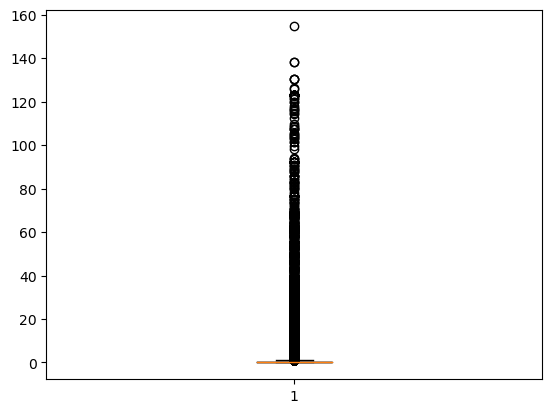

In [32]:
plt.boxplot(txs['total'])

<AxesSubplot:>

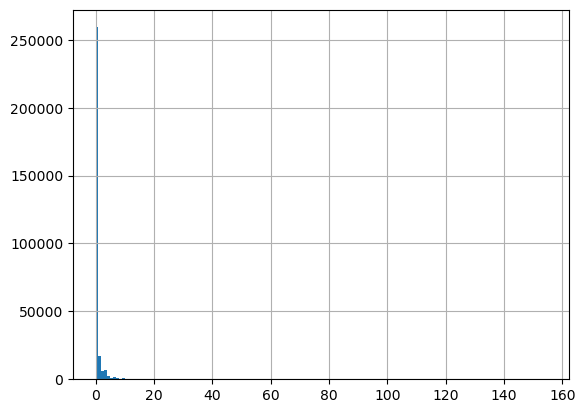

In [33]:
# Se obtiene el rango de datos
rango_datos = txs['total'].max() - txs['total'].min()

# Se calcula la cantidad de bins deseada
cantidad_bins = int(rango_datos) + 1

txs['total'].hist(bins=cantidad_bins)

In [34]:
txs[txs.total==0].count()

src         125603
dst         125603
total       125603
trx_type    125603
trx_date    125603
dtype: int64

Transferencia    238541
Compras           61649
Name: trx_type, dtype: int64
Transferencia    0.794633
Compras          0.205367
Name: trx_type, dtype: float64


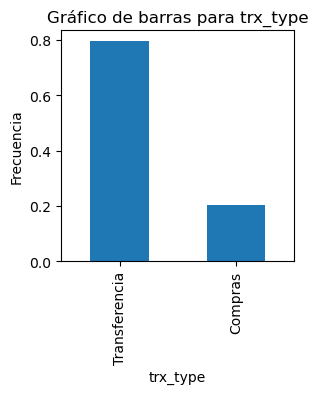

In [35]:
frecuencia = txs['trx_type'].value_counts(normalize=True)
print(txs['trx_type'].value_counts())
print(txs['trx_type'].value_counts(normalize=True))
plt.figure(figsize=(3, 3))
frecuencia.plot(kind='bar')
plt.xlabel('trx_type')
plt.ylabel('Frecuencia')
plt.title(f'Gráfico de barras para trx_type')
plt.show()

In [36]:
txs['dst'].nunique()

89034

In [74]:
print(txs['trx_date'].min())
print(txs['trx_date'].max())

2022-01-10 00:00:00
2023-02-06 00:00:00


In [17]:
### Se va resumir la base transaccional con variables calculadas por cuenta que origina la transaccion
txs_agrupada = txs.groupby(['src']).agg({'src': 'count', 'total': 'sum'})
txs_agrupada = txs_agrupada.rename(columns={'src': 'tot_trx', 'total': 'tot_montos'})

In [18]:
txs_agrupada.head(10)

,tot_trx,tot_montos
src,,
72412115,133,436.98
72412144,232,828.95
72412219,179,209.06
72412267,33,133.87
72412272,486,2032.33
72412283,335,946.33
72412288,172,445.62
72412293,48,132.07
72412298,131,729.50


In [19]:
## Se resetea indices
txs_agrupada.reset_index(inplace=True)

In [21]:
txs_agrupada.head(10)

,src,tot_trx,tot_montos
0,72412115,133,436.98
1,72412144,232,828.95
2,72412219,179,209.06
3,72412267,33,133.87
4,72412272,486,2032.33
5,72412283,335,946.33
6,72412288,172,445.62
7,72412293,48,132.07
8,72412298,131,729.50
9,72412303,35,59.73


In [12]:
## Se resetea indices
txs_agrupada.reset_index(inplace=True)

In [22]:
txs_agrupada[txs_agrupada.duplicated(subset='src')].count()

src           0
tot_trx       0
tot_montos    0
dtype: int64

In [23]:
## se rellena con 0 los datos faltantes
txs_agrupada=txs_agrupada.fillna(0)

In [24]:
### cambio de formato de variables float a enteras
txs_agrupada['tot_trx']=txs_agrupada['tot_trx'].astype(int)
txs_agrupada['src']=txs_agrupada['src'].astype(int).astype(str)

In [25]:
txs_agrupada.head(10)

,src,tot_trx,tot_montos
0,72412115,133,436.98
1,72412144,232,828.95
2,72412219,179,209.06
3,72412267,33,133.87
4,72412272,486,2032.33
5,72412283,335,946.33
6,72412288,172,445.62
7,72412293,48,132.07
8,72412298,131,729.50
9,72412303,35,59.73


In [26]:
txs_agrupada.dtypes

src            object
tot_trx         int32
tot_montos    float64
dtype: object

In [27]:
txs_agrupada.isna().sum()

src           0
tot_trx       0
tot_montos    0
dtype: int64

## UNION DE BASES DE DATOS

In [28]:
print(clients.shape)
df_union=clients.merge(txs_agrupada,left_on='account', right_on='src',how='left')
print(df_union.shape)

(90808, 8)
(90808, 11)


In [29]:
df_union.head(10)

,account,sex,civil_status,education_level,flag_use,last_date_tx,generation,flag_referred,src,tot_trx,tot_montos
0,73656722,Hombre,Casado,Bachillerato,1,2022-09-11,Millennials,1,73656722,6.0,0.04
1,73533953,Hombre,Soltero,Bachillerato,1,2022-08-30,Millennials,0,73533953,1.0,0.31
2,73081212,Mujer,Soltero,Bachillerato,1,2022-08-28,Millennials,0,73081212,1.0,0.00
3,74128769,Hombre,Casado,Bachillerato,1,2023-02-04,Millennials,0,74128769,3.0,8.28
4,73732039,Hombre,Soltero,Basica,1,2022-09-13,Centennials,1,73732039,2.0,0.00
5,73599693,Hombre,Soltero,Bachillerato,1,2022-09-02,Centennials,1,73599693,5.0,0.31
6,73405229,Mujer,Soltero,Bachillerato,1,2022-09-04,Millennials,1,73405229,4.0,0.03
7,73689836,Mujer,Casado,Bachillerato,1,2022-09-30,Millennials,1,73689836,2.0,0.04
8,73645836,Mujer,Casado,Bachillerato,1,2022-09-04,Millennials,1,73645836,2.0,0.92
9,73653629,Hombre,Soltero,Bachillerato,1,2022-08-31,Centennials,1,73653629,1.0,0.00


In [30]:
df_union.columns

Index(['account', 'sex', 'civil_status', 'education_level', 'flag_use',
       'last_date_tx', 'generation', 'flag_referred', 'src', 'tot_trx',
       'tot_montos'],
      dtype='object')

In [31]:
df_union.isna().sum()

account               0
sex                   0
civil_status          0
education_level       0
flag_use              0
last_date_tx       5336
generation            0
flag_referred         0
src                4790
tot_trx            4790
tot_montos         4790
dtype: int64

## SEGMENTACION DE DATA

In [32]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn_extra.cluster import KMedoids
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import pairwise_distances
from gower import gower_matrix

import numpy as np
from sklearn.metrics import silhouette_score

In [33]:
#Limpio data para la segmentación
segmentacion = df_union.set_index('account')
segmentacion = segmentacion.dropna() ### se eliminan los registros que no cruzaron porque no tienen transacciones, además los algoritmos no supervisados no adminten datos faltantes

In [34]:
segmentacion.drop(['last_date_tx','src', 'flag_use','flag_referred', 'sex','civil_status'], axis = 1, inplace =True)

In [70]:
segmentacion.head(2)

,education_level,generation,tot_trx,tot_montos
account,,,,
73656722,Bachillerato,Millennials,6.0,0.04
73533953,Bachillerato,Millennials,1.0,0.31


In [36]:
segmentacion.shape

(84110, 4)

In [37]:
#conteo de datos faltantes
segmentacion.isna().sum()

education_level    0
generation         0
tot_trx            0
tot_montos         0
dtype: int64

In [71]:
# Obtener una muestra aleatoria de tamaño n
n = 30000  # Tamaño de la muestra
segmentacion_rs = segmentacion.sample(n, random_state=42)

In [72]:
segmentacion_rs.shape

(30000, 4)

In [73]:
categorical_cols = ['education_level','generation']
numeric_cols= ['tot_montos','tot_trx']  

In [74]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [75]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [76]:
X = preprocessor.fit_transform(segmentacion_rs)

In [77]:
# gower_distances
dmatrix = gower_matrix(X)

k: 2
k: 3
k: 4
k: 5
k: 6


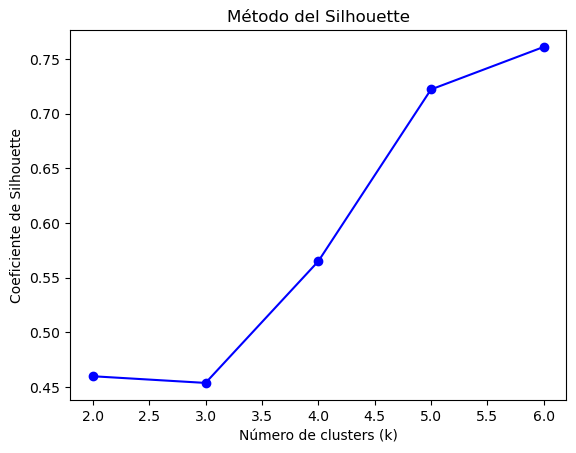

In [80]:
## Metodo del codo

silhouette_scores = []

# Define el rango de valores de k (número de clusters)
k_values = range(2, 7)

# Itera sobre los diferentes valores de k
for k in k_values:
    # Crea una instancia del algoritmo de clustering K-means
    print('k:', k)
    kmedoids = KMedoids(n_clusters=k, metric='precomputed',init='k-medoids++')
    
    # Ajusta el modelo a los datos y realiza el clustering
    kmedoids.fit(dmatrix)
    
    # Calcula el coeficiente de silhouette para evaluar el rendimiento
    silhouette_scores.append(silhouette_score(dmatrix, kmedoids.labels_))

# Grafica la curva del método de silhouette
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Método del Silhouette')
plt.show()


In [81]:
# si selecciono k optimo 4
k=4
kmedoids = KMedoids(n_clusters=k, metric='precomputed',init='k-medoids++')

In [82]:
algoritmo=kmedoids.fit(dmatrix)
labels = kmedoids.labels_

In [83]:
labels

array([2, 0, 3, ..., 2, 0, 0], dtype=int64)

In [86]:
centroids= dmatrix[kmedoids.medoid_indices_]

In [90]:
segmentacion_rs['Cluster'] = labels

In [91]:
segmentacion_rs.shape

(30000, 5)

In [99]:
segmentacion_rs.columns

Index(['account', 'education_level', 'generation', 'tot_trx', 'tot_montos',
       'Cluster', 'sex', 'civil_status', 'flag_referred', 'flag_use'],
      dtype='object')

In [92]:
segmentacion_rs.head(10)

,education_level,generation,tot_trx,tot_montos,Cluster
account,,,,,
73842693,Bachillerato,Millennials,2.0,2.46,2
73880076,Bachillerato,X Generation,2.0,0.01,0
73837321,Superior,Millennials,2.0,1.23,3
74303778,Bachillerato,Centennials,13.0,9.52,0
73288725,Bachillerato,Millennials,1.0,0.92,2
73564156,Bachillerato,Millennials,1.0,0.08,2
73588505,Bachillerato,Millennials,2.0,0.92,2
73419946,Basica,Centennials,2.0,0.92,0
73573513,Bachillerato,Baby Boomers,2.0,0.31,2


In [93]:
segmentacion_rs.reset_index(inplace=True)

In [94]:
segmentacion_rs=segmentacion_rs.merge(df_union[['account','sex','civil_status','flag_referred','flag_use']],on='account')

In [95]:
df_union.columns

Index(['account', 'sex', 'civil_status', 'education_level', 'flag_use',
       'last_date_tx', 'generation', 'flag_referred', 'src', 'tot_trx',
       'tot_montos'],
      dtype='object')

In [96]:
segmentacion_rs.shape

(30000, 10)

In [69]:
segmentacion_rs.to_excel('segmentacion_group.xlsx', index =False)

In [97]:
segmentacion_group = segmentacion_rs.groupby(['Cluster']).agg({'tot_montos': 'median','tot_trx': 'median'})

In [98]:
segmentacion_group.head(10)

,tot_montos,tot_trx
Cluster,,
0,0.01,2.0
1,0.03,1.0
2,0.08,2.0
3,0.31,2.0


## COMO ESTA EL FUTURO?

In [355]:
## Base de datos de transacciones
txs = pd.read_excel('txs.xlsx',sheet_name="grp_trnx")
print('Shape Tabla Clientes', txs.shape)
txs.head(5)

Shape Tabla Clientes (326607, 5)


,src,dst,total,trx_type,trx_date
0,72856503.0,523781.0,2.42,Compras,2022-08-07
1,72412283.0,523779.0,0.31,Compras,2022-08-07
2,72856503.0,523780.0,0.49,Compras,2022-08-07
3,72856503.0,523782.0,0.59,Compras,2022-08-07
4,72412288.0,LATINOMEDICAL KS,5.15,Compras,2022-11-07


In [356]:
#Extraer el año y el mes 
txs['anio_mes'] = txs['trx_date'].dt.strftime('%Y_%m')

In [357]:
txs.head(10)

,src,dst,total,trx_type,trx_date,anio_mes
0,72856503.0,523781.0,2.42,Compras,2022-08-07,2022_08
1,72412283.0,523779.0,0.31,Compras,2022-08-07,2022_08
2,72856503.0,523780.0,0.49,Compras,2022-08-07,2022_08
3,72856503.0,523782.0,0.59,Compras,2022-08-07,2022_08
4,72412288.0,LATINOMEDICAL KS,5.15,Compras,2022-11-07,2022_11
5,73498445.0,PedidosYa Restaurant,1.44,Compras,2022-11-07,2022_11
6,73474073.0,PMZ RAPPIEC,0.34,Compras,2022-11-07,2022_11
7,74133532.0,PedidosYa Supermerca,4.17,Compras,2022-11-07,2022_11
8,74133532.0,PedidosYa Supermerca,5.65,Compras,2022-11-07,2022_11
9,74133532.0,PedidosYa Supermerca,4.01,Compras,2022-11-07,2022_11


In [358]:
print(txs['anio_mes'].min())
print(txs['anio_mes'].max())

2022_01
2023_02


In [359]:
print(txs['trx_date'].min())
print(txs['trx_date'].max())

2022-01-10 00:00:00
2023-02-06 00:00:00


In [360]:
## Se elimina datos faltantes para la variable src
txs = txs.dropna(subset=['src'])
txs.count()

src         326433
dst         326433
total       326433
trx_type    326433
trx_date    326433
anio_mes    326433
dtype: int64

In [361]:
### Se eliminan duplicados de registros (26243) 
txs = txs.drop_duplicates()
txs.count()

src         300190
dst         300190
total       300190
trx_type    300190
trx_date    300190
anio_mes    300190
dtype: int64

In [362]:
## Se tomaran solo años completos por ende quitaré el mes de febrero 2023 del análisis y enero 2022
txs = txs[~txs.anio_mes.isin(['2023_02','2022_01'])]

In [363]:
print(txs.shape)
txs.anio_mes.value_counts().sort_index()

(294392, 6)


2022_02        26
2022_03      1004
2022_04       715
2022_05      2553
2022_06      2575
2022_07      1511
2022_08    126672
2022_09     97992
2022_10      8155
2022_11     10111
2022_12     17984
2023_01     25094
Name: anio_mes, dtype: int64

In [364]:
#cambio de formato de entero a text de la columna src
txs['src']=txs['src'].astype(int).astype(str)

In [365]:
### Se va resumir la base transaccional con variables calculadas por cuenta que origina la transaccion, tipo de transaccion y ano-mes
txs_agrupada = txs.groupby(['src', 'trx_type','anio_mes']).agg({'src': 'count', 'total': 'sum'})
txs_agrupada = txs_agrupada.rename(columns={'src': 'tot_trx', 'total': 'tot_montos'})
txs_agrupada.head(10)

tot_trx  tot_montos
src      trx_type      anio_mes                     
72412115 Compras       2022_09         8       30.47
                       2022_10        25       29.53
                       2022_11        12       40.90
                       2022_12        19      241.32
                       2023_01         3       18.44
         Transferencia 2022_02         1        0.31
                       2022_03         5        0.15
                       2022_04         1        0.31
                       2022_05         8        8.73
                       2022_06         8        1.92

In [366]:
## Se resetea el indice
txs_agrupada=txs_agrupada.reset_index()
txs_agrupada.head(5)

,src,trx_type,anio_mes,tot_trx,tot_montos
0,72412115,Compras,2022_09,8,30.47
1,72412115,Compras,2022_10,25,29.53
2,72412115,Compras,2022_11,12,40.90
3,72412115,Compras,2022_12,19,241.32
4,72412115,Compras,2023_01,3,18.44


In [367]:
### Se pivotea la tabla
txs_agrupada = pd.pivot_table(txs_agrupada, values=['tot_trx','tot_montos'], index='src',columns=['trx_type','anio_mes'])
txs_agrupada.columns=['_'.join(map(str,col)) for col in txs_agrupada.columns]
txs_agrupada.head(10)

,tot_montos_Compras_2022_07,tot_montos_Compras_2022_08,tot_montos_Compras_2022_09,tot_montos_Compras_2022_10,tot_montos_Compras_2022_11,tot_montos_Compras_2022_12,tot_montos_Compras_2023_01,tot_montos_Transferencia_2022_02,tot_montos_Transferencia_2022_03,tot_montos_Transferencia_2022_04,tot_montos_Transferencia_2022_05,tot_montos_Transferencia_2022_06,tot_montos_Transferencia_2022_07,tot_montos_Transferencia_2022_08,tot_montos_Transferencia_2022_09,tot_montos_Transferencia_2022_10,tot_montos_Transferencia_2022_11,tot_montos_Transferencia_2022_12,tot_montos_Transferencia_2023_01,tot_trx_Compras_2022_07,tot_trx_Compras_2022_08,tot_trx_Compras_2022_09,tot_trx_Compras_2022_10,tot_trx_Compras_2022_11,tot_trx_Compras_2022_12,tot_trx_Compras_2023_01,tot_trx_Transferencia_2022_02,tot_trx_Transferencia_2022_03,tot_trx_Transferencia_2022_04,tot_trx_Transferencia_2022_05,tot_trx_Transferencia_2022_06,tot_trx_Transferencia_2022_07,tot_trx_Transferencia_2022_08,tot_trx_Transferencia_2022_09,tot_trx_Transferencia_2022_10,tot_trx_Transferencia_2022_11,tot_trx_Transferencia_2022_12,tot_trx_Transferencia_2023_01
src,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72412115,NaN,NaN,30.47,29.53,40.90,241.32,18.44,0.31,0.15,0.31,8.73,1.92,3.34,8.76,4.88,9.11,6.90,2.61,19.31,NaN,NaN,8.0,25.0,12.0,19.0,3.0,1.0,5.0,1.0,8.0,8.0,6.0,9.0,5.0,3.0,5.0,1.0,8.0
72412144,NaN,10.21,8.50,34.64,54.10,166.98,49.67,14.43,7.44,10.19,43.60,35.54,29.52,35.06,18.42,99.12,55.01,43.37,63.62,NaN,3.0,1.0,10.0,11.0,26.0,10.0,4.0,15.0,11.0,9.0,16.0,12.0,19.0,5.0,14.0,11.0,14.0,18.0
72412219,8.94,38.23,16.62,35.88,37.76,27.18,NaN,5.33,NaN,4.23,1.79,4.63,NaN,17.82,4.15,4.19,NaN,NaN,0.61,12.0,53.0,10.0,19.0,15.0,13.0,NaN,1.0,NaN,8.0,13.0,9.0,NaN,8.0,3.0,3.0,NaN,NaN,1.0
72412267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61,NaN,41.14,46.16,22.26,5.12,2.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,6.0,5.0,8.0,2.0,2.0,NaN,NaN,NaN
72412272,NaN,18.76,25.79,50.07,86.41,167.54,153.35,9.20,21.49,62.69,158.92,53.75,72.16,88.95,75.24,225.93,274.07,182.22,247.83,NaN,3.0,4.0,15.0,16.0,65.0,65.0,5.0,16.0,24.0,45.0,40.0,32.0,46.0,28.0,24.0,22.0,9.0,11.0
72412283,NaN,17.59,82.24,19.78,97.38,136.37,90.82,0.15,14.48,43.35,6.38,9.68,118.24,59.39,13.23,14.38,108.88,50.16,47.83,NaN,10.0,49.0,13.0,46.0,28.0,18.0,1.0,10.0,11.0,13.0,7.0,11.0,31.0,11.0,13.0,19.0,18.0,12.0
72412288,NaN,6.08,NaN,5.54,56.56,67.09,59.25,NaN,31.79,89.03,1.88,0.85,2.47,15.84,13.93,19.02,6.79,21.08,25.35,NaN,1.0,NaN,5.0,14.0,33.0,35.0,NaN,17.0,6.0,4.0,4.0,4.0,11.0,3.0,5.0,2.0,5.0,4.0
72412293,NaN,NaN,2.23,NaN,7.64,29.32,25.09,NaN,0.15,0.31,3.07,NaN,0.31,10.75,2.30,NaN,0.92,13.91,35.15,NaN,NaN,2.0,NaN,6.0,10.0,6.0,NaN,1.0,1.0,1.0,NaN,1.0,3.0,1.0,NaN,2.0,4.0,8.0
72412298,NaN,24.45,NaN,15.29,38.28,164.90,65.16,0.62,1.54,5.98,93.48,20.99,25.49,35.39,68.69,28.85,29.09,49.73,40.98,NaN,2.0,NaN,2.0,8.0,20.0,10.0,2.0,2.0,2.0,4.0,11.0,3.0,11.0,3.0,10.0,10.0,11.0,12.0


In [368]:
#Creación de variables para modelación
print([col for col in txs_agrupada.columns if '2023_01' in col])
txs_agrupada = txs_agrupada[[col for col in txs_agrupada.columns if '2023_01' not in col]]

['tot_montos_Compras_2023_01', 'tot_montos_Transferencia_2023_01', 'tot_trx_Compras_2023_01', 'tot_trx_Transferencia_2023_01']


In [369]:
txs_agrupada.head()

,tot_montos_Compras_2022_07,tot_montos_Compras_2022_08,tot_montos_Compras_2022_09,tot_montos_Compras_2022_10,tot_montos_Compras_2022_11,tot_montos_Compras_2022_12,tot_montos_Transferencia_2022_02,tot_montos_Transferencia_2022_03,tot_montos_Transferencia_2022_04,tot_montos_Transferencia_2022_05,tot_montos_Transferencia_2022_06,tot_montos_Transferencia_2022_07,tot_montos_Transferencia_2022_08,tot_montos_Transferencia_2022_09,tot_montos_Transferencia_2022_10,tot_montos_Transferencia_2022_11,tot_montos_Transferencia_2022_12,tot_trx_Compras_2022_07,tot_trx_Compras_2022_08,tot_trx_Compras_2022_09,tot_trx_Compras_2022_10,tot_trx_Compras_2022_11,tot_trx_Compras_2022_12,tot_trx_Transferencia_2022_02,tot_trx_Transferencia_2022_03,tot_trx_Transferencia_2022_04,tot_trx_Transferencia_2022_05,tot_trx_Transferencia_2022_06,tot_trx_Transferencia_2022_07,tot_trx_Transferencia_2022_08,tot_trx_Transferencia_2022_09,tot_trx_Transferencia_2022_10,tot_trx_Transferencia_2022_11,tot_trx_Transferencia_2022_12
src,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72412115,NaN,NaN,30.47,29.53,40.90,241.32,0.31,0.15,0.31,8.73,1.92,3.34,8.76,4.88,9.11,6.90,2.61,NaN,NaN,8.0,25.0,12.0,19.0,1.0,5.0,1.0,8.0,8.0,6.0,9.0,5.0,3.0,5.0,1.0
72412144,NaN,10.21,8.50,34.64,54.10,166.98,14.43,7.44,10.19,43.60,35.54,29.52,35.06,18.42,99.12,55.01,43.37,NaN,3.0,1.0,10.0,11.0,26.0,4.0,15.0,11.0,9.0,16.0,12.0,19.0,5.0,14.0,11.0,14.0
72412219,8.94,38.23,16.62,35.88,37.76,27.18,5.33,NaN,4.23,1.79,4.63,NaN,17.82,4.15,4.19,NaN,NaN,12.0,53.0,10.0,19.0,15.0,13.0,1.0,NaN,8.0,13.0,9.0,NaN,8.0,3.0,3.0,NaN,NaN
72412267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61,NaN,41.14,46.16,22.26,5.12,2.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,6.0,5.0,8.0,2.0,2.0,NaN,NaN
72412272,NaN,18.76,25.79,50.07,86.41,167.54,9.20,21.49,62.69,158.92,53.75,72.16,88.95,75.24,225.93,274.07,182.22,NaN,3.0,4.0,15.0,16.0,65.0,5.0,16.0,24.0,45.0,40.0,32.0,46.0,28.0,24.0,22.0,9.0


In [370]:
[col for col in txs_agrupada.columns if 'Transfere' in col]

['tot_montos_Transferencia_2022_02',
 'tot_montos_Transferencia_2022_03',
 'tot_montos_Transferencia_2022_04',
 'tot_montos_Transferencia_2022_05',
 'tot_montos_Transferencia_2022_06',
 'tot_montos_Transferencia_2022_07',
 'tot_montos_Transferencia_2022_08',
 'tot_montos_Transferencia_2022_09',
 'tot_montos_Transferencia_2022_10',
 'tot_montos_Transferencia_2022_11',
 'tot_montos_Transferencia_2022_12',
 'tot_trx_Transferencia_2022_02',
 'tot_trx_Transferencia_2022_03',
 'tot_trx_Transferencia_2022_04',
 'tot_trx_Transferencia_2022_05',
 'tot_trx_Transferencia_2022_06',
 'tot_trx_Transferencia_2022_07',
 'tot_trx_Transferencia_2022_08',
 'tot_trx_Transferencia_2022_09',
 'tot_trx_Transferencia_2022_10',
 'tot_trx_Transferencia_2022_11',
 'tot_trx_Transferencia_2022_12']

In [371]:
[col for col in txs_agrupada.columns if 'Compr' in col]

['tot_montos_Compras_2022_07',
 'tot_montos_Compras_2022_08',
 'tot_montos_Compras_2022_09',
 'tot_montos_Compras_2022_10',
 'tot_montos_Compras_2022_11',
 'tot_montos_Compras_2022_12',
 'tot_trx_Compras_2022_07',
 'tot_trx_Compras_2022_08',
 'tot_trx_Compras_2022_09',
 'tot_trx_Compras_2022_10',
 'tot_trx_Compras_2022_11',
 'tot_trx_Compras_2022_12']

In [372]:
#Se crean variables de trx últimos 6 meses por transferencia y compra
vars_montos_compras = [col for col in txs_agrupada.columns if 'montos' in col and 'Compras' in col]
vars_trx_compras= [col for col in txs_agrupada.columns if 'trx' in col and 'Compras' in col]
vars_montos_transf = [col for col in txs_agrupada.columns if 'montos' in col and 'Transferencia' in col]
vars_trx_transf = [col for col in txs_agrupada.columns if 'trx' in col and 'Transferencia' in col]

In [373]:
vars_montos_compras[-6:]

['tot_montos_Compras_2022_07',
 'tot_montos_Compras_2022_08',
 'tot_montos_Compras_2022_09',
 'tot_montos_Compras_2022_10',
 'tot_montos_Compras_2022_11',
 'tot_montos_Compras_2022_12']

In [374]:
txs_agrupada = txs_agrupada.fillna(0)

In [375]:
txs_agrupada['tot_montos_6m_compras'] = txs_agrupada[vars_montos_compras[-6:]].sum(axis=1)
txs_agrupada['tot_montos_6m_transf'] = txs_agrupada[vars_montos_transf[-6:]].sum(axis=1)
txs_agrupada['tot_trx_6m_compras'] = txs_agrupada[vars_trx_compras[-6:]].sum(axis=1)
txs_agrupada['tot_trx_6m_transf'] = txs_agrupada[vars_trx_transf[-6:]].sum(axis=1)

###
txs_agrupada['avg_montos_6m_compras'] = txs_agrupada[vars_montos_compras[-6:]].mean(axis=1)
txs_agrupada['avg_montos_6m_transf'] = txs_agrupada[vars_montos_transf[-6:]].mean(axis=1)
txs_agrupada['avg_trx_6m_compras'] = txs_agrupada[vars_trx_compras[-6:]].mean(axis=1)
txs_agrupada['avg_trx_6m_transf'] = txs_agrupada[vars_trx_transf[-6:]].mean(axis=1)

###
txs_agrupada['max_montos_6m_compras'] = txs_agrupada[vars_montos_compras[-6:]].max(axis=1)
txs_agrupada['max_montos_6m_transf'] = txs_agrupada[vars_montos_transf[-6:]].max(axis=1)
txs_agrupada['max_trx_6m_compras'] = txs_agrupada[vars_trx_compras[-6:]].max(axis=1)
txs_agrupada['max_trx_6m_transf'] = txs_agrupada[vars_trx_transf[-6:]].max(axis=1)

In [376]:
txs_agrupada.head()

,tot_montos_Compras_2022_07,tot_montos_Compras_2022_08,tot_montos_Compras_2022_09,tot_montos_Compras_2022_10,tot_montos_Compras_2022_11,tot_montos_Compras_2022_12,tot_montos_Transferencia_2022_02,tot_montos_Transferencia_2022_03,tot_montos_Transferencia_2022_04,tot_montos_Transferencia_2022_05,tot_montos_Transferencia_2022_06,tot_montos_Transferencia_2022_07,tot_montos_Transferencia_2022_08,tot_montos_Transferencia_2022_09,tot_montos_Transferencia_2022_10,tot_montos_Transferencia_2022_11,tot_montos_Transferencia_2022_12,tot_trx_Compras_2022_07,tot_trx_Compras_2022_08,tot_trx_Compras_2022_09,tot_trx_Compras_2022_10,tot_trx_Compras_2022_11,tot_trx_Compras_2022_12,tot_trx_Transferencia_2022_02,tot_trx_Transferencia_2022_03,tot_trx_Transferencia_2022_04,tot_trx_Transferencia_2022_05,tot_trx_Transferencia_2022_06,tot_trx_Transferencia_2022_07,tot_trx_Transferencia_2022_08,tot_trx_Transferencia_2022_09,tot_trx_Transferencia_2022_10,tot_trx_Transferencia_2022_11,tot_trx_Transferencia_2022_12,tot_montos_6m_compras,tot_montos_6m_transf,tot_trx_6m_compras,tot_trx_6m_transf,avg_montos_6m_compras,avg_montos_6m_transf,avg_trx_6m_compras,avg_trx_6m_transf,max_montos_6m_compras,max_montos_6m_transf,max_trx_6m_compras,max_trx_6m_transf
src,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72412115,0.00,0.00,30.47,29.53,40.90,241.32,0.31,0.15,0.31,8.73,1.92,3.34,8.76,4.88,9.11,6.90,2.61,0.0,0.0,8.0,25.0,12.0,19.0,1.0,5.0,1.0,8.0,8.0,6.0,9.0,5.0,3.0,5.0,1.0,342.22,35.60,64.0,29.0,57.036667,5.933333,10.666667,4.833333,241.32,9.11,25.0,9.0
72412144,0.00,10.21,8.50,34.64,54.10,166.98,14.43,7.44,10.19,43.60,35.54,29.52,35.06,18.42,99.12,55.01,43.37,0.0,3.0,1.0,10.0,11.0,26.0,4.0,15.0,11.0,9.0,16.0,12.0,19.0,5.0,14.0,11.0,14.0,274.43,280.50,51.0,75.0,45.738333,46.750000,8.500000,12.500000,166.98,99.12,26.0,19.0
72412219,8.94,38.23,16.62,35.88,37.76,27.18,5.33,0.00,4.23,1.79,4.63,0.00,17.82,4.15,4.19,0.00,0.00,12.0,53.0,10.0,19.0,15.0,13.0,1.0,0.0,8.0,13.0,9.0,0.0,8.0,3.0,3.0,0.0,0.0,164.61,26.16,122.0,14.0,27.435000,4.360000,20.333333,2.333333,38.23,17.82,53.0,8.0
72412267,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.00,41.14,46.16,22.26,5.12,2.63,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,5.0,8.0,2.0,2.0,0.0,0.0,0.00,76.17,0.0,17.0,0.000000,12.695000,0.000000,2.833333,0.00,46.16,0.0,8.0
72412272,0.00,18.76,25.79,50.07,86.41,167.54,9.20,21.49,62.69,158.92,53.75,72.16,88.95,75.24,225.93,274.07,182.22,0.0,3.0,4.0,15.0,16.0,65.0,5.0,16.0,24.0,45.0,40.0,32.0,46.0,28.0,24.0,22.0,9.0,348.57,918.57,103.0,161.0,58.095000,153.095000,17.166667,26.833333,167.54,274.07,65.0,46.0


In [377]:
txs_agrupada = txs_agrupada[[col for col in txs_agrupada.columns if '6m' in col]]

In [378]:
txs_agrupada.head()

,tot_montos_6m_compras,tot_montos_6m_transf,tot_trx_6m_compras,tot_trx_6m_transf,avg_montos_6m_compras,avg_montos_6m_transf,avg_trx_6m_compras,avg_trx_6m_transf,max_montos_6m_compras,max_montos_6m_transf,max_trx_6m_compras,max_trx_6m_transf
src,,,,,,,,,,,,
72412115,342.22,35.60,64.0,29.0,57.036667,5.933333,10.666667,4.833333,241.32,9.11,25.0,9.0
72412144,274.43,280.50,51.0,75.0,45.738333,46.750000,8.500000,12.500000,166.98,99.12,26.0,19.0
72412219,164.61,26.16,122.0,14.0,27.435000,4.360000,20.333333,2.333333,38.23,17.82,53.0,8.0
72412267,0.00,76.17,0.0,17.0,0.000000,12.695000,0.000000,2.833333,0.00,46.16,0.0,8.0
72412272,348.57,918.57,103.0,161.0,58.095000,153.095000,17.166667,26.833333,167.54,274.07,65.0,46.0


In [379]:
txs_agrupada.reset_index(inplace = True)

In [380]:
txs_agrupada.shape

(85492, 13)

### Creación variable objetivo Y

Se va a predecir la propensión de uso de la tarjeta al mes siguiente. En este caso para el entrenamiento del modelo se considera el mes de enero/2023 como la variable objetivo, que tomará los valores de 0 y 1. Es 1 si se realizaron transacciones en la cuenta ese mes y sino, es 0.

In [381]:
### Se va resumir la base transaccional con variables calculadas por cuenta que origina la transaccion, tipo de transaccion y ano-mes
vobj = txs.groupby(['src','anio_mes']).agg({'src': 'count'})
vobj = vobj.rename(columns={'src': 'tot_trx'}).reset_index()
vobj.head(5)

,src,anio_mes,tot_trx
0,72412115,2022_02,1
1,72412115,2022_03,5
2,72412115,2022_04,1
3,72412115,2022_05,8
4,72412115,2022_06,8


In [382]:
vobj = pd.pivot_table(vobj, values=['tot_trx'], index='src',columns=['anio_mes']).reset_index().fillna(0)
vobj.columns=['_'.join(map(str,col)) for col in vobj.columns]
vobj.head(5)

,src_,tot_trx_2022_02,tot_trx_2022_03,tot_trx_2022_04,tot_trx_2022_05,tot_trx_2022_06,tot_trx_2022_07,tot_trx_2022_08,tot_trx_2022_09,tot_trx_2022_10,tot_trx_2022_11,tot_trx_2022_12,tot_trx_2023_01
0,72412115,1.0,5.0,1.0,8.0,8.0,6.0,9.0,13.0,28.0,17.0,20.0,11.0
1,72412144,4.0,15.0,11.0,9.0,16.0,12.0,22.0,6.0,24.0,22.0,40.0,28.0
2,72412219,1.0,0.0,8.0,13.0,9.0,12.0,61.0,13.0,22.0,15.0,13.0,1.0
3,72412267,0.0,0.0,2.0,0.0,6.0,5.0,8.0,2.0,2.0,0.0,0.0,0.0
4,72412272,5.0,16.0,24.0,45.0,40.0,32.0,49.0,32.0,39.0,38.0,74.0,76.0


In [383]:
vobj = vobj[['src_','tot_trx_2023_01']]

In [384]:
vobj.rename(columns={'src_':'src'}, inplace = True)
vobj['y_true'] = np.where(vobj['tot_trx_2023_01']>0, 1, 0)
vobj.head()

,src,tot_trx_2023_01,y_true
0,72412115,11.0,1
1,72412144,28.0,1
2,72412219,1.0,1
3,72412267,0.0,0
4,72412272,76.0,1


In [385]:
vobj.y_true.mean()

0.05359565807327001

In [386]:
vobj.y_true.value_counts()

0    80910
1     4582
Name: y_true, dtype: int64

### Creación de tabla master

In [387]:
### Base de datos de clientes
clients = pd.read_excel(r'clients.xlsx')
print('Shape Tabla Clientes', clients.shape)
clients.head(5)

Shape Tabla Clientes (90808, 8)


,account,sex,civil_status,education_level,flag_use,last_date_tx,generation,flag_referred
0,73656722,Hombre,Casado,Bachillerato,1,2022-09-11,Millennials,1
1,73533953,Hombre,Soltero,Bachillerato,1,2022-08-30,Millennials,0
2,73081212,Mujer,Soltero,Bachillerato,1,2022-08-28,Millennials,0
3,74128769,Hombre,Casado,Bachillerato,1,2023-02-04,Millennials,0
4,73732039,Hombre,Soltero,Basica,1,2022-09-13,Centennials,1


In [388]:
## Se convierte la variable account en texto
clients['account']=clients['account'].astype(int).astype(str)
clients['flag_use']=clients['flag_use'].astype(int)
clients['flag_referred']=clients['flag_referred'].astype(int)
clients.dtypes

account                    object
sex                        object
civil_status               object
education_level            object
flag_use                    int32
last_date_tx       datetime64[ns]
generation                 object
flag_referred               int32
dtype: object

In [389]:
## renombrar account como src para el cruce
clients.rename(columns={'account':'src'}, inplace = True)

In [343]:
print(clients.dtypes)
print(vobj.dtypes)
print(txs_agrupada.dtypes)

src                        object
sex                        object
civil_status               object
education_level            object
flag_use                    int32
last_date_tx       datetime64[ns]
generation                 object
flag_referred               int32
dtype: object
src                 object
tot_trx_2023_01    float64
y_true               int32
dtype: object
src                       object
tot_montos_6m_compras    float64
tot_montos_6m_transf     float64
tot_trx_6m_compras       float64
tot_trx_6m_transf        float64
avg_montos_6m_compras    float64
avg_montos_6m_transf     float64
avg_trx_6m_compras       float64
avg_trx_6m_transf        float64
max_montos_6m_compras    float64
max_montos_6m_transf     float64
max_trx_6m_compras       float64
max_trx_6m_transf        float64
dtype: object


In [390]:
print(clients.shape)
mdt=clients.merge(txs_agrupada,on='src',how='left')
print(mdt.shape)

(90808, 8)
(90808, 20)


In [391]:
print(mdt.shape)
mdt=mdt.merge(vobj[['src', 'y_true']],on='src',how='left')
print(mdt.shape)

(90808, 20)
(90808, 21)


In [392]:
mdt.head()

,src,sex,civil_status,education_level,flag_use,last_date_tx,generation,flag_referred,tot_montos_6m_compras,tot_montos_6m_transf,tot_trx_6m_compras,tot_trx_6m_transf,avg_montos_6m_compras,avg_montos_6m_transf,avg_trx_6m_compras,avg_trx_6m_transf,max_montos_6m_compras,max_montos_6m_transf,max_trx_6m_compras,max_trx_6m_transf,y_true
0,73656722,Hombre,Casado,Bachillerato,1,2022-09-11,Millennials,1,0.0,0.04,0.0,6.0,0.0,0.006667,0.0,1.000000,0.0,0.04,0.0,6.0,0.0
1,73533953,Hombre,Soltero,Bachillerato,1,2022-08-30,Millennials,0,0.0,0.31,0.0,1.0,0.0,0.051667,0.0,0.166667,0.0,0.31,0.0,1.0,0.0
2,73081212,Mujer,Soltero,Bachillerato,1,2022-08-28,Millennials,0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0
3,74128769,Hombre,Casado,Bachillerato,1,2023-02-04,Millennials,0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,1.0
4,73732039,Hombre,Soltero,Basica,1,2022-09-13,Centennials,1,0.0,0.00,0.0,2.0,0.0,0.000000,0.0,0.333333,0.0,0.00,0.0,2.0,0.0


In [395]:
mdt.isna().sum()

src                      0
sex                      0
civil_status             0
education_level          0
flag_use                 0
last_date_tx             0
generation               0
flag_referred            0
tot_montos_6m_compras    0
tot_montos_6m_transf     0
tot_trx_6m_compras       0
tot_trx_6m_transf        0
avg_montos_6m_compras    0
avg_montos_6m_transf     0
avg_trx_6m_compras       0
avg_trx_6m_transf        0
max_montos_6m_compras    0
max_montos_6m_transf     0
max_trx_6m_compras       0
max_trx_6m_transf        0
y_true                   0
dtype: int64

In [394]:
### Se elimina duplicados
mdt = mdt.dropna()

In [396]:
mdt.last_date_tx.min()

Timestamp('2022-03-07 00:00:00')

In [397]:
mdt.last_date_tx.max()

Timestamp('2023-02-06 00:00:00')

In [398]:
## Se tomaran solo años completos por ende quitaré el mes de febrero 2023 del análisis
mdt['anio_mes'] = mdt['last_date_tx'].dt.strftime('%Y_%m')
#mdt = mdt[~mdt.anio_mes.isin(['2022_01','2023_02'])]

In [399]:
mdt.anio_mes.max()

'2023_02'

In [400]:
# Se eliminan las cuentas que tuvieron como ultima fecha de transaccion en feb/2023
mdt = mdt[~mdt.anio_mes.isin(['2023_02'])]

In [401]:
print(mdt.shape)

(82459, 22)


In [402]:
mdt.head(2)

,src,sex,civil_status,education_level,flag_use,last_date_tx,generation,flag_referred,tot_montos_6m_compras,tot_montos_6m_transf,tot_trx_6m_compras,tot_trx_6m_transf,avg_montos_6m_compras,avg_montos_6m_transf,avg_trx_6m_compras,avg_trx_6m_transf,max_montos_6m_compras,max_montos_6m_transf,max_trx_6m_compras,max_trx_6m_transf,y_true,anio_mes
0,73656722,Hombre,Casado,Bachillerato,1,2022-09-11,Millennials,1,0.0,0.04,0.0,6.0,0.0,0.006667,0.0,1.000000,0.0,0.04,0.0,6.0,0.0,2022_09
1,73533953,Hombre,Soltero,Bachillerato,1,2022-08-30,Millennials,0,0.0,0.31,0.0,1.0,0.0,0.051667,0.0,0.166667,0.0,0.31,0.0,1.0,0.0,2022_08


In [404]:
#mdt_final = mdt_final.set_index('src')
mdt=mdt.drop(['last_date_tx','sex','anio_mes'], axis = 1)

In [405]:
mdt.columns

Index(['src', 'civil_status', 'education_level', 'flag_use', 'generation',
       'flag_referred', 'tot_montos_6m_compras', 'tot_montos_6m_transf',
       'tot_trx_6m_compras', 'tot_trx_6m_transf', 'avg_montos_6m_compras',
       'avg_montos_6m_transf', 'avg_trx_6m_compras', 'avg_trx_6m_transf',
       'max_montos_6m_compras', 'max_montos_6m_transf', 'max_trx_6m_compras',
       'max_trx_6m_transf', 'y_true'],
      dtype='object')

In [406]:
cat_cols = ['civil_status','education_level','generation']
num_cols= ['tot_montos_6m_compras',
       'tot_montos_6m_transf', 'tot_trx_6m_compras', 'tot_trx_6m_transf',
       'avg_montos_6m_compras', 'avg_montos_6m_transf', 'avg_trx_6m_compras',
       'avg_trx_6m_transf', 'max_montos_6m_compras', 'max_montos_6m_transf',
       'max_trx_6m_compras', 'max_trx_6m_transf']  

In [407]:
mdt.shape

(82459, 19)

### One hot encoding

In [408]:
# Aplico One-Hot Encoding solo a las columnas categóricas
mdt_final = pd.get_dummies(mdt, columns=cat_cols)

In [409]:
mdt_final.head(3)
print(mdt_final.shape)

(82459, 30)


In [410]:
mdt_final.columns

Index(['src', 'flag_use', 'flag_referred', 'tot_montos_6m_compras',
       'tot_montos_6m_transf', 'tot_trx_6m_compras', 'tot_trx_6m_transf',
       'avg_montos_6m_compras', 'avg_montos_6m_transf', 'avg_trx_6m_compras',
       'avg_trx_6m_transf', 'max_montos_6m_compras', 'max_montos_6m_transf',
       'max_trx_6m_compras', 'max_trx_6m_transf', 'y_true',
       'civil_status_Casado', 'civil_status_Divorciado',
       'civil_status_En Union De Hecho', 'civil_status_Soltero',
       'civil_status_Viudo', 'education_level_Bachillerato',
       'education_level_Basica', 'education_level_Ninguna',
       'education_level_Superior', 'generation_Baby Boomers',
       'generation_Centennials', 'generation_Millennials',
       'generation_Silent Generation', 'generation_X Generation'],
      dtype='object')

In [411]:
## limpieza de nombres de columnas
mdt_final.columns = mdt_final.columns.str.replace(' ', '_').str.lower()

In [412]:
mdt_final['y_true'] = mdt_final['y_true'].astype(int)

In [422]:
#Librerías y funciones para entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix


### Train y Test dataset

In [414]:
mdt_final.set_index('src', inplace = True)

In [415]:
X = mdt_final.drop('y_true', axis = 1)
y = mdt_final[['y_true']]

In [416]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y['y_true'], random_state=123)

# Se verifican las formas de los conjuntos de entrenamiento y prueba
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (65967, 28)
Shape de X_test: (16492, 28)
Shape de y_train: (65967, 1)
Shape de y_test: (16492, 1)


In [419]:
#Se aplican los algoritmos de clasificación -  Seteo de clasificadores base
seed = 123
rf_cls = RandomForestClassifier(n_estimators=50, random_state=seed)
ada_cls= AdaBoostClassifier(n_estimators=50, random_state=seed)
xgb_cls = xgb.XGBClassifier(objective='binary:logistic', n_estimators=50, scale_pos_weight = 30,seed=123)

clasificadores = [rf_cls, ada_cls, xgb_cls]

In [420]:
for cls in clasificadores:
    print('Algoritmo: ', cls)
    cls.fit(X_train, y_train)
    y_pred_train = cls.predict(X_train)
    y_pred = cls.predict(X_test)
    y_pred_probs_train = cls.predict_proba(X_train)[:, 1]
    y_pred_probs = cls.predict_proba(X_test)[:, 1]
    
    print('Métricas')
    #Cálculos de métricas
    recall_train = recall_score(y_train, y_pred_train)
    recall = recall_score(y_test, y_pred)
    print('Recall Train: ', recall_train)
    print('Recall Test: ', recall)
    ####
    precision_train = precision_score(y_train, y_pred_train)
    precision = precision_score(y_test, y_pred)
    print('Precision Train: ', precision_train)
    print('Precision Test: ', precision)
    ####
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Train: ', accuracy_train)
    print('Accuracy Test: ', accuracy)
    ####AUC-ROC
    auc_roc_train = roc_auc_score(y_train, y_pred_probs_train)
    auc_roc = roc_auc_score(y_test, y_pred_probs)
    print('AUC-ROC Train: ', auc_roc_train)
    print('AUC-ROC Test: ', auc_roc)
    
    print('###############################')

Algoritmo:  RandomForestClassifier(n_estimators=50, random_state=123)
Métricas
Recall Train:  0.6612137203166227
Recall Test:  0.39451476793248946
Precision Train:  0.8588074023303632
Precision Test:  0.5936507936507937
Accuracy Train:  0.9871450876953628
Accuracy Test:  0.9748362842590347
AUC-ROC Train:  0.981616982840215
AUC-ROC Test:  0.9126021464249342
###############################
Algoritmo:  AdaBoostClassifier(random_state=123)
Métricas
Recall Train:  0.2511873350923483
Recall Test:  0.20253164556962025
Precision Train:  0.5972396486825596
Precision Test:  0.5
Accuracy Train:  0.9736231752239757
Accuracy Test:  0.9712587921416445
AUC-ROC Train:  0.9274160607904498
AUC-ROC Test:  0.922453932364065
###############################
Algoritmo:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=Non

In [423]:
### Ajuste del modelo seleccionado XGB
modelo_final=xgb.XGBClassifier(objective='binary:logistic', n_estimators=50, scale_pos_weight = 30,seed=123)
modelo_final.fit(X_train, y_train)
y_pred_train = modelo_final.predict(X_train)
y_pred = modelo_final.predict(X_test)

In [426]:
#Matriz de confusion
cm_train = confusion_matrix(y_train, y_pred_train)
print('Matriz de confusión para Train') 
print(cm_train)
cm_test = confusion_matrix(y_test, y_pred)
print('Matriz de confusión para Test')
print(cm_test)

Matriz de confusión para Train
[[60894  3178]
 [  206  1689]]
Matriz de confusión para Test
[[15205   813]
 [   82   392]]


In [429]:
##test
print(392/(392+813))### precision
print(392/(392+82))### recall

0.3253112033195021
0.8270042194092827


### Conclusion
Para este caso me quedaré con XGBClassifier como algoritmo, siento un algoritmo basado en el boosting, que en este caso presenta mejor rendimiento en las metricas de recall y precision, frente a los demás algoritmos. 

## Interpretacion del modelo

In [431]:
import shap

In [433]:
# Calcular los SHAP values
explainer = shap.Explainer(modelo_final.predict, X_test)
shap_values = explainer(X_test)


Permutation explainer: 16493it [10:58, 24.68it/s]                           


In [455]:
X_test.head(2)

,src,flag_use,flag_referred,tot_montos_6m_compras,tot_montos_6m_transf,tot_trx_6m_compras,tot_trx_6m_transf,avg_montos_6m_compras,avg_montos_6m_transf,avg_trx_6m_compras,avg_trx_6m_transf,max_montos_6m_compras,max_montos_6m_transf,max_trx_6m_compras,max_trx_6m_transf,civil_status_casado,civil_status_divorciado,civil_status_en_union_de_hecho,civil_status_soltero,civil_status_viudo,education_level_bachillerato,education_level_basica,education_level_ninguna,education_level_superior,generation_baby_boomers,generation_centennials,generation_millennials,generation_silent_generation,generation_x_generation,prediccion,account,Cluster
7930,72412293,1,0,39.19,28.19,18.0,11.0,6.531667,4.698333,3.000000,1.833333,29.32,13.91,10.0,4.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.998481,72412293,2.0
2280,73917244,1,1,41.12,0.08,11.0,1.0,6.853333,0.013333,1.833333,0.166667,25.77,0.08,6.0,1.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.998437,73917244,2.0


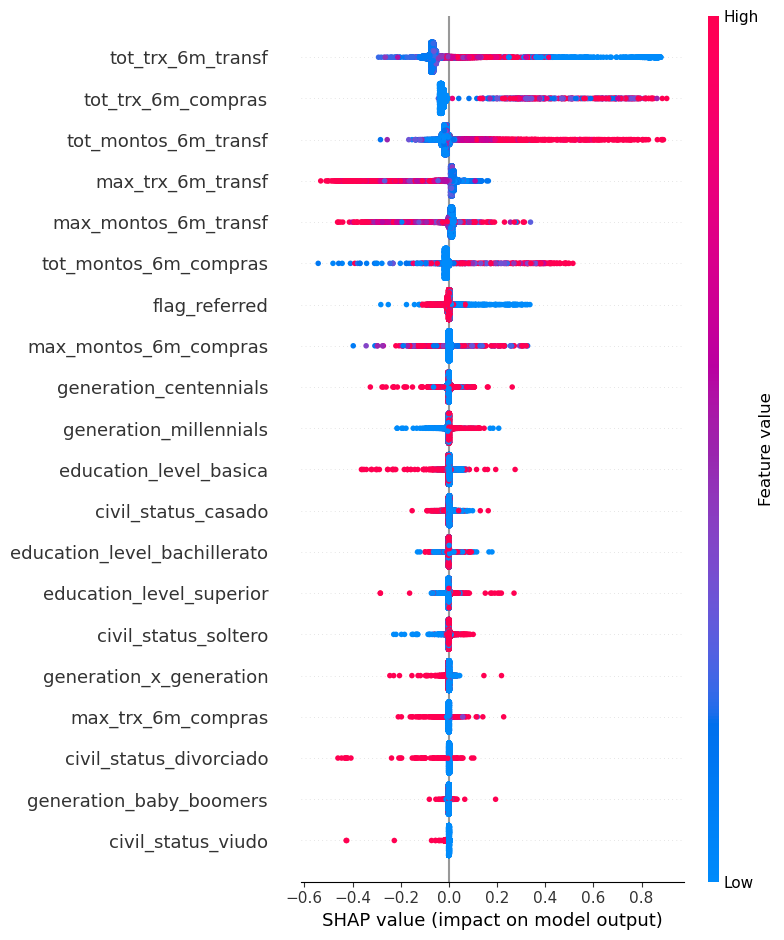

In [434]:
# Mostrar los SHAP values
shap.summary_plot(shap_values)

### Generando score para priorización en una campaña de incentivo de uso de tarjeta

In [435]:
### generando el score
#y_pred_probs_train = modelo_final.predict_proba(X_train)[:, 1]
y_pred_probs = modelo_final.predict_proba(X_test)[:, 1]


In [437]:
X_test['prediccion']= y_pred_probs

In [443]:
X_test.head(10)

,src,flag_use,flag_referred,tot_montos_6m_compras,tot_montos_6m_transf,tot_trx_6m_compras,tot_trx_6m_transf,avg_montos_6m_compras,avg_montos_6m_transf,avg_trx_6m_compras,avg_trx_6m_transf,max_montos_6m_compras,max_montos_6m_transf,max_trx_6m_compras,max_trx_6m_transf,civil_status_casado,civil_status_divorciado,civil_status_en_union_de_hecho,civil_status_soltero,civil_status_viudo,education_level_bachillerato,education_level_basica,education_level_ninguna,education_level_superior,generation_baby_boomers,generation_centennials,generation_millennials,generation_silent_generation,generation_x_generation,prediccion
0,73447336,1,1,0.0,0.02,0.0,7.0,0.0,0.003333,0.0,1.166667,0.0,0.02,0.0,5.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.110959
1,73789682,1,1,0.0,0.00,0.0,1.0,0.0,0.000000,0.0,0.166667,0.0,0.00,0.0,1.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.090657
2,73717102,1,1,0.0,0.31,0.0,1.0,0.0,0.051667,0.0,0.166667,0.0,0.31,0.0,1.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.119876
3,73449517,1,1,0.0,0.31,0.0,1.0,0.0,0.051667,0.0,0.166667,0.0,0.31,0.0,1.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0.080273
4,74289622,1,0,0.0,6.14,0.0,1.0,0.0,1.023333,0.0,0.166667,0.0,6.14,0.0,1.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.826125
5,73388275,1,1,0.0,1.84,0.0,3.0,0.0,0.306667,0.0,0.500000,0.0,1.84,0.0,3.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0.050763
6,73940593,1,1,0.0,0.00,0.0,1.0,0.0,0.000000,0.0,0.166667,0.0,0.00,0.0,1.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.092396
7,73821123,1,1,0.0,0.00,0.0,1.0,0.0,0.000000,0.0,0.166667,0.0,0.00,0.0,1.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.090657
8,73381697,1,1,0.0,0.00,0.0,3.0,0.0,0.000000,0.0,0.500000,0.0,0.00,0.0,3.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.091376
9,73567884,1,1,0.0,0.00,0.0,2.0,0.0,0.000000,0.0,0.333333,0.0,0.00,0.0,2.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.114677


In [442]:
X_test.reset_index(inplace = True)

In [440]:
segmentos=pd.read_excel('segmentacion_group.xlsx')

In [441]:
segmentos.head()

,account,education_level,generation,tot_trx,tot_montos,Cluster,sex,civil_status,flag_referred,flag_use
0,73842693,Bachillerato,Millennials,2,2.46,2,Mujer,Soltero,1,1
1,73880076,Bachillerato,X Generation,2,0.01,1,Hombre,Soltero,1,1
2,73837321,Superior,Millennials,2,1.23,0,Mujer,Soltero,1,1
3,74303778,Bachillerato,Centennials,13,9.52,1,Hombre,Soltero,0,1
4,73288725,Bachillerato,Millennials,1,0.92,2,Hombre,Soltero,1,1


In [445]:
segmentos['account'] = segmentos['account'].astype(int).astype(str)

In [446]:
print(X_test.shape)
X_test = X_test.merge(segmentos[['account','Cluster']], left_on = 'src', right_on = 'account', how = 'left')
print(X_test.shape)

(16492, 30)
(16492, 32)


In [450]:
#Base para campaña
X_test = X_test[~X_test.Cluster.isna()]

In [453]:
X_test.sort_values(by = 'prediccion', ascending = False, inplace = True)

,src,flag_use,flag_referred,tot_montos_6m_compras,tot_montos_6m_transf,tot_trx_6m_compras,tot_trx_6m_transf,avg_montos_6m_compras,avg_montos_6m_transf,avg_trx_6m_compras,avg_trx_6m_transf,max_montos_6m_compras,max_montos_6m_transf,max_trx_6m_compras,max_trx_6m_transf,civil_status_casado,civil_status_divorciado,civil_status_en_union_de_hecho,civil_status_soltero,civil_status_viudo,education_level_bachillerato,education_level_basica,education_level_ninguna,education_level_superior,generation_baby_boomers,generation_centennials,generation_millennials,generation_silent_generation,generation_x_generation,prediccion,account,Cluster
7930,72412293,1,0,39.19,28.19,18.0,11.0,6.531667,4.698333,3.000000,1.833333,29.32,13.91,10.0,4.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.998481,72412293,2.0
2280,73917244,1,1,41.12,0.08,11.0,1.0,6.853333,0.013333,1.833333,0.166667,25.77,0.08,6.0,1.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.998437,73917244,2.0
10525,73476020,1,1,39.10,0.99,14.0,5.0,6.516667,0.165000,2.333333,0.833333,17.84,0.76,9.0,4.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.997031,73476020,2.0
3168,73716676,1,1,5.94,0.93,13.0,3.0,0.990000,0.155000,2.166667,0.500000,4.22,0.93,10.0,3.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0.996388,73716676,1.0
225,73435756,1,0,36.32,0.30,6.0,2.0,6.053333,0.050000,1.000000,0.333333,22.68,0.30,4.0,2.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.995086,73435756,0.0
4269,73962535,1,0,40.41,0.00,6.0,0.0,6.735000,0.000000,1.000000,0.000000,21.81,0.00,3.0,0.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.993794,73962535,0.0
2531,72882324,1,0,176.40,0.00,101.0,0.0,29.400000,0.000000,16.833333,0.000000,67.65,0.00,40.0,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0.993761,72882324,0.0
14272,73080836,1,0,40.12,0.00,11.0,0.0,6.686667,0.000000,1.833333,0.000000,26.59,0.00,8.0,0.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.992250,73080836,0.0
16038,74141576,1,0,4.69,0.00,9.0,0.0,0.781667,0.000000,1.500000,0.000000,4.69,0.00,9.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.990506,74141576,1.0
3316,72862915,1,1,59.28,2.46,35.0,4.0,9.880000,0.410000,5.833333,0.666667,41.30,1.54,25.0,2.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.990490,72862915,2.0


In [454]:
X_test[['src','prediccion','Cluster']].head(10)

,src,prediccion,Cluster
7930,72412293,0.998481,2.0
2280,73917244,0.998437,2.0
10525,73476020,0.997031,2.0
3168,73716676,0.996388,1.0
225,73435756,0.995086,0.0
4269,73962535,0.993794,0.0
2531,72882324,0.993761,0.0
14272,73080836,0.992250,0.0
16038,74141576,0.990506,1.0
3316,72862915,0.990490,2.0


In [456]:
X_test.to_excel('base_campaña.xlsx', index =False)